In [1]:
from maelzel.core import *
from pitchtools import *
from maelzel.snd.audiosample import Sample
import numpy as np
import os

Clip(source=/home/em/dev/python/maelzel/notebooks/snd/colours-german-male.flac, numChannels=1, sr=44100, dur=None, resolvedDur=10.742812…, sourcedursecs=10.743secs)
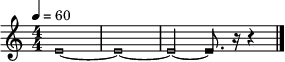

In [8]:
cl = Clip(os.path.abspath("snd/colours-german-male.flac"), pitch="4E")
cl

Sample(dur=10.74281179138322, sr=44100, ch=1)
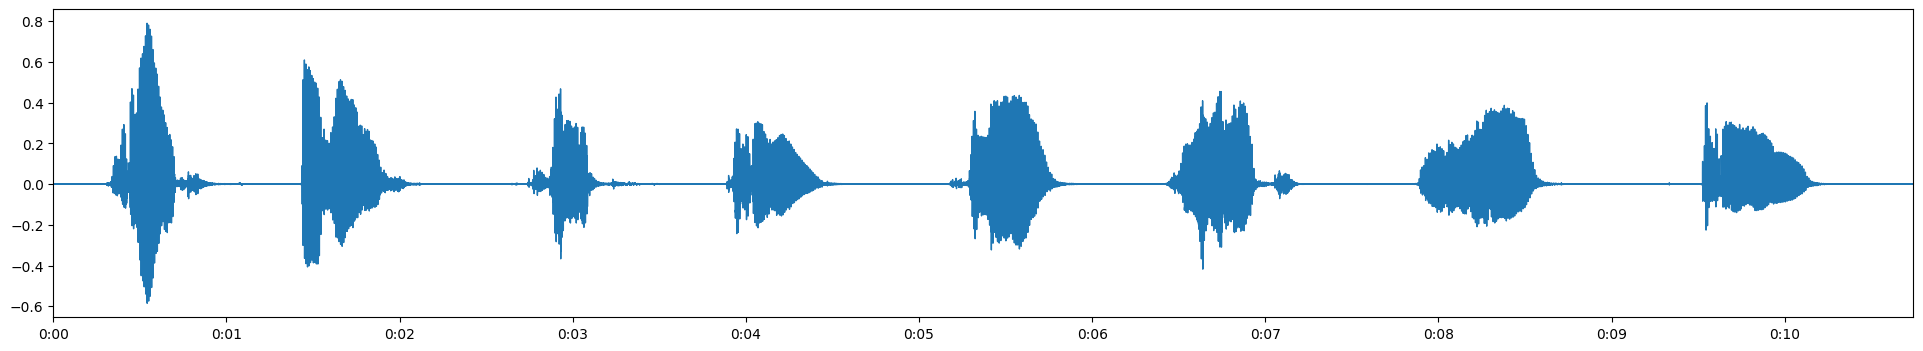

In [9]:
cl.asSample()

In [3]:
cfg = CoreConfig()
cfg['show.respellPitches'] = False
cfg['show.centsDeviationAsTextAnnotation'] = False
cfg['chordAdjustGain'] = False
cfg['show.voiceMaxStaves'] = 2
cfg.activate()

In [14]:
dt = 1/16
times = np.arange(0, cl.durSecs(), dt)
chords = [cl.chordAt(t, mindb=-55, dur=dt, maxcount=8, ampfactor=10, maxfreq=m2f(126), minfreq=40) or Rest(dt) for t in times]
chain = Chain(chords)

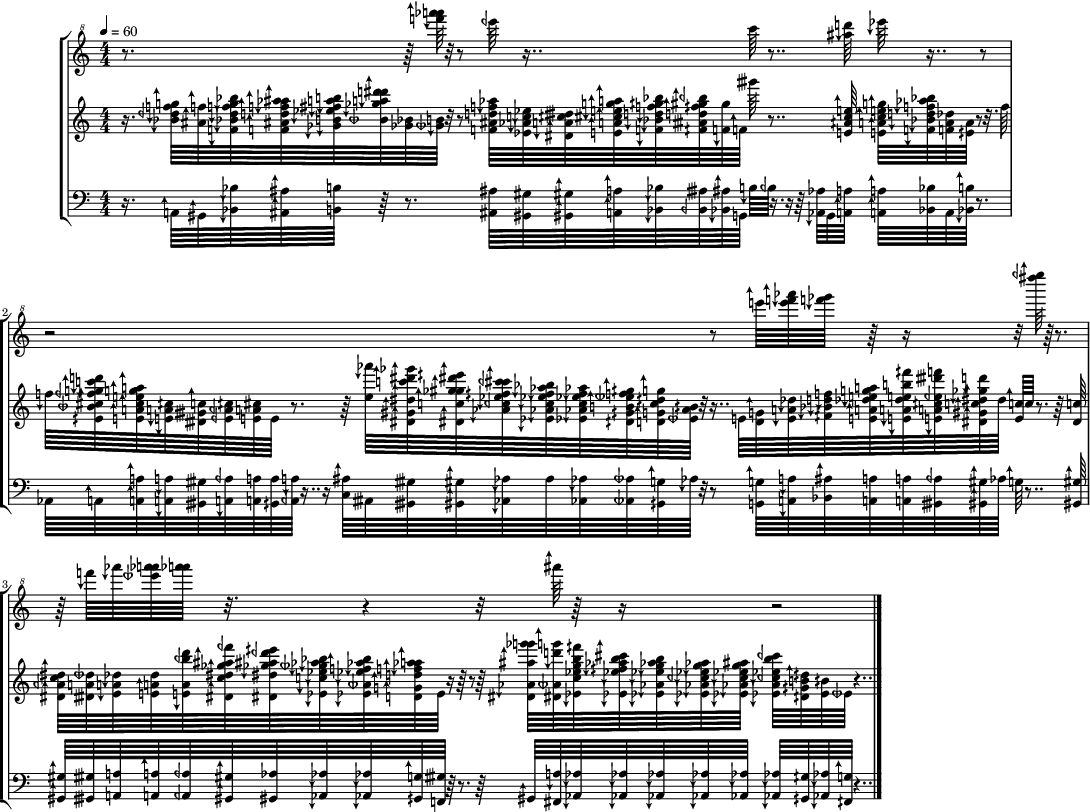

In [15]:
chain.show()

OfflineRenderer(sr=44100)
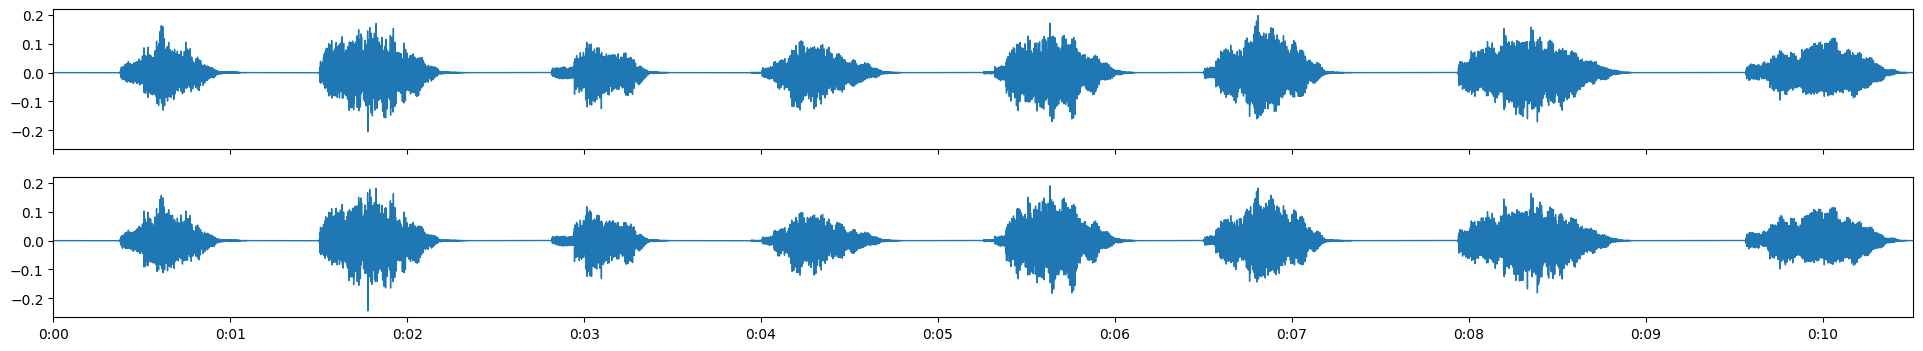

In [17]:
chain.rec(gain=0.2, instr='piano', fade=(0.01, 0.1), sustain=0.2)

OfflineRenderer(sr=44100)
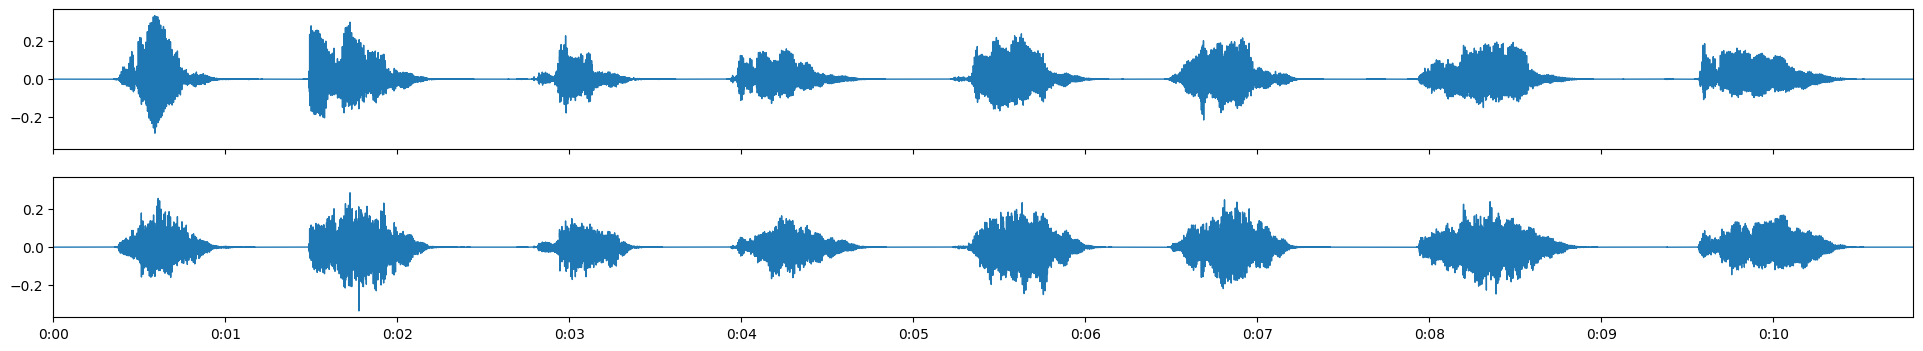

In [28]:
with render() as r:
    chain.play(gain=0.2, instr='piano', fade=(0.01, 0.1), sustain=0.2, position=0.75)
    cl.play(position=0.25, gain=0.5, delay=0.05)
r

Chain([Rest:0.062♩, Rest:0.062♩, Rest:0.062♩, Rest:0.062♩, Rest:0.062♩, Rest:0.062♩, ‹2A 4Bb 5Db 5F 5G 0.0625♩›, ‹2Ab 4Bb 5F 0.0625♩›, ‹2Bb 3Bb 4F 4Bb 5D 5F 5G 5Bb 0.0625♩›, ‹2Bb 3Bb 4F 4Bb 5D 5F 5Ab 5Bb 0.0625♩›, …])
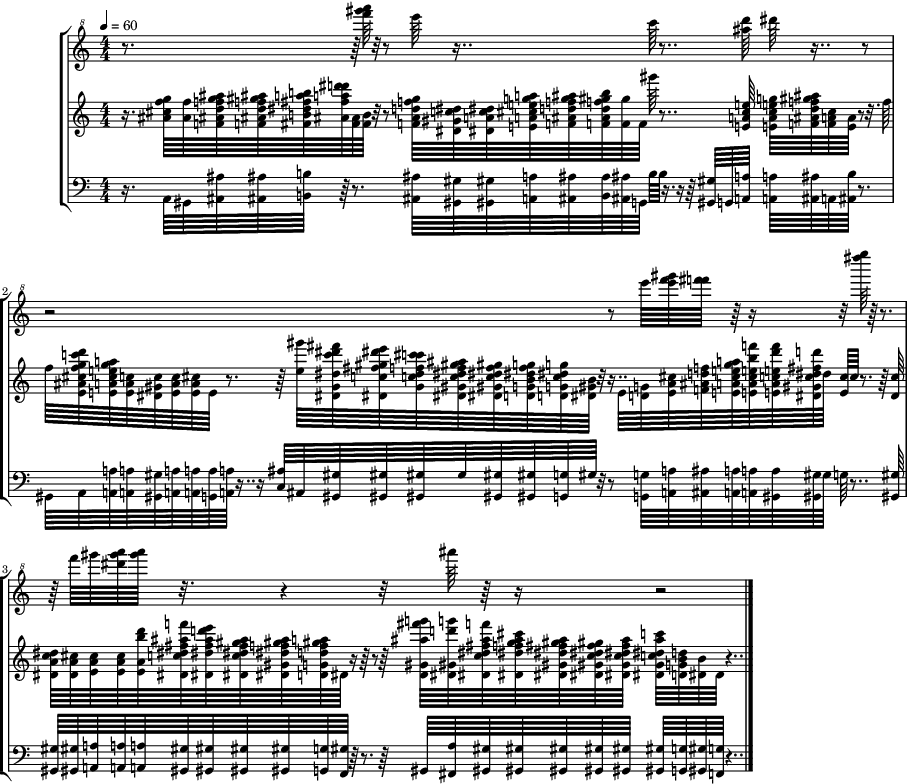

In [18]:
chain2 = chain.quantizePitch(step=1)
chain2

OfflineRenderer(sr=44100)
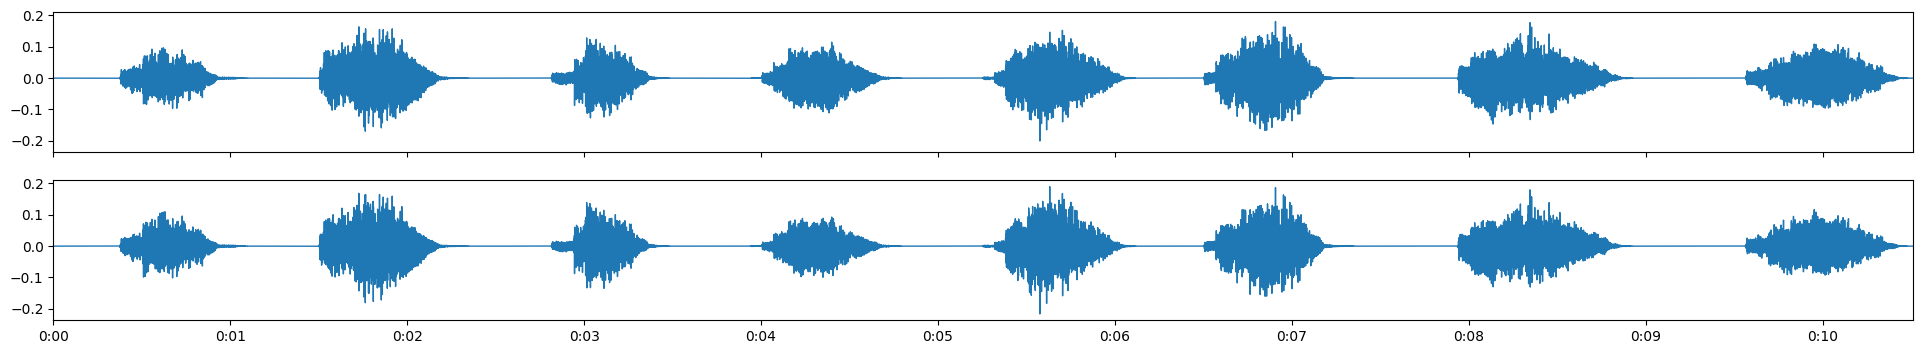

In [19]:
chain2.rec(gain=0.2, instr='piano', fade=(0.01, 0.1), sustain=0.2)

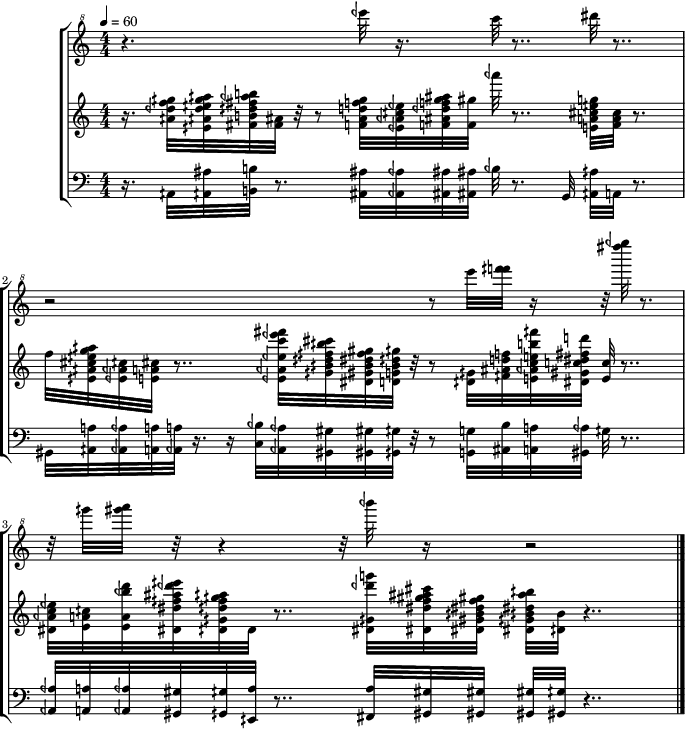

In [48]:
dt = 1/8
times = np.arange(0, cl.durSecs(), dt)
chords = [cl.chordAt(t, mindb=-55, dur=dt, maxcount=8, ampfactor=10, maxfreq=m2f(126), minfreq=40) or Rest(dt) for t in times]
chain3 = Chain(chords)
chain3 = chain3.quantizePitch(step=0.5)
chain3.show()

OfflineRenderer(sr=44100)
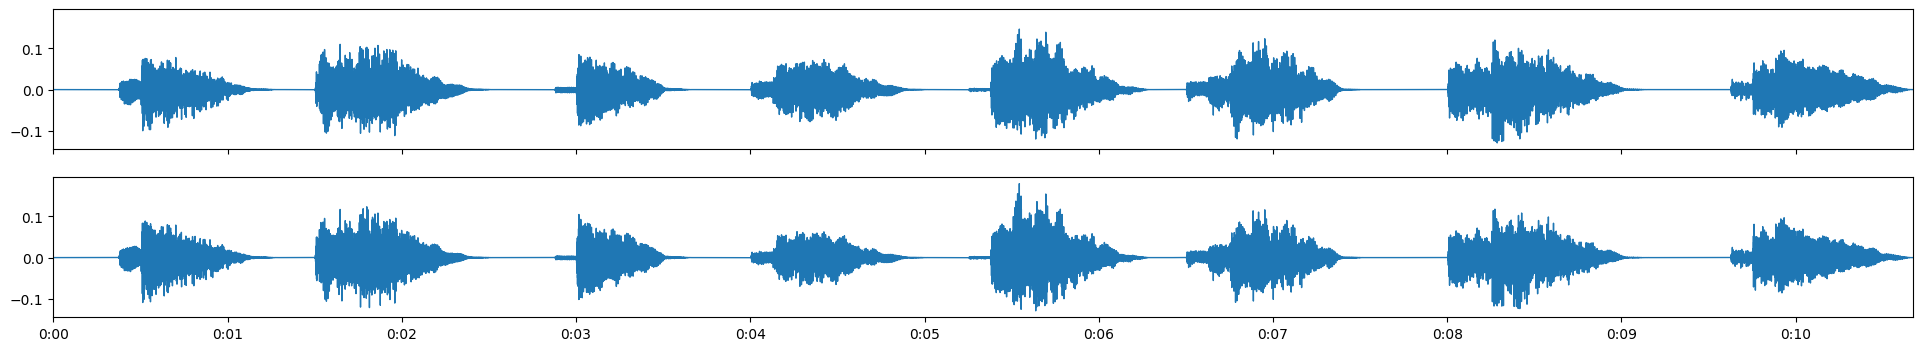

In [50]:
chain3.rec(gain=0.2, instr='piano', fade=(0.01, 0.3), sustain=0.3)